In [ ]:
!pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=f66720e0c441ef2e4a302a256374a33c2756383373adcc93cfaf3fd2ab0a1bd1
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [ ]:
import sklearn
import pandas as pd
import numpy
from scipy.integrate import quad
import matplotlib.pyplot as plt
from numpy import trapz
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from micromlgen import port

In [ ]:
df = pd.read_csv("/content/BAk-data-discharging_csv.csv")
df.columns = ['voltage','current','time']
df

,voltage,current,time
0,3.891907,-2.698792,0.000000
1,3.888245,-2.699066,0.200000
2,3.885498,-2.698517,0.400000
3,3.883057,-2.698792,0.600000
4,3.880920,-2.698792,0.800000
...,...,...,...
12533,2.801208,-2.699615,2506.599994
12534,2.800903,-2.699066,2506.799994
12535,2.800293,-2.698517,2506.999994
12536,2.799683,-2.698792,2507.199994


In [ ]:
# to accomodate 3s-3p battery pack

df["voltage"] = df["voltage"] * 3
df["current"] = df["current"] * 3
df

,voltage,current,time
0,11.675720,-8.096375,0.000000
1,11.664734,-8.097198,0.200000
2,11.656494,-8.095551,0.400000
3,11.649170,-8.096375,0.600000
4,11.642761,-8.096375,0.800000
...,...,...,...
12533,8.403625,-8.098846,2506.599994
12534,8.402710,-8.097198,2506.799994
12535,8.400879,-8.095551,2506.999994
12536,8.399048,-8.096375,2507.199994


In [ ]:
# v = df["voltage"]
# i = df["current"]
# t = df["time"]

# arr = []
# for j in range(len(df)):
#   idt = (-i[j])*t[j]/3600
#   arr.append(idt)
#   idt += idt

# arr

In [ ]:
ocv = (df["voltage"].iloc[0])
ocv

11.675720214

In [ ]:
min_v = df["voltage"].iloc[-1]
max_v = df["voltage"].iloc[0]
range_v = max_v - min_v
for i in range(0,len(df["voltage"])):
  new_v = (df["voltage"].iloc[i] - min_v)/range_v
  df["voltage"].iloc[i] = new_v

min_i = df["current"].iloc[-1]
max_i = df["current"].iloc[0]
range_i = max_i - min_i
for i in range(0,len(df["current"])):
  new_i = (df["current"].iloc[i] - min_i)/range_i
  df["current"].iloc[i] = new_i

min_t = df["time"].iloc[0]
max_t = df["time"].iloc[-1]
range_t = max_t - min_t
for i in range(0,len(df["time"])):
  new_t = (df["time"].iloc[i] - min_t)/range_t
  df["time"].iloc[i] = new_t

df

,voltage,current,time
0,1.000000,1.000000,0.000000
1,0.996648,0.500000,0.000080
2,0.994134,1.500000,0.000160
3,0.991899,1.000000,0.000239
4,0.989944,1.000000,0.000319
...,...,...,...
12533,0.001676,-0.500002,0.999681
12534,0.001397,0.500000,0.999761
12535,0.000838,1.500000,0.999840
12536,0.000279,1.000000,0.999920


Text(0.5, 1.0, 'current vs time')

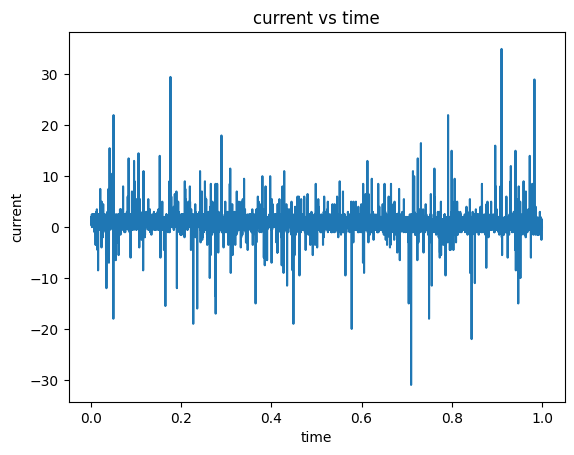

In [ ]:
x = df["time"]
y = df["current"]
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("current")
plt.title("current vs time")

In [ ]:
y = df["current"].iloc[0:]
x = df["time"].iloc[0:]
capacity = 8.1

In [ ]:
n = len(df["current"])
arr = []
for t in range(2,n+1):
  y = df["current"].iloc[0:t]
  x = df["time"].iloc[0:t]
  arr.append(abs(numpy.trapz(y,x))*8.1)
arr


[0.00048456568430758185,
 0.0011306532666149115,
 0.0019382627404607655,
 0.0025843503227677466,
 0.003553481691382562,
 0.004361091169266463,
 0.004845656853574045,
 0.005330222540304455,
 0.005653266329843076,
 0.006137832016573486,
 0.006945441490419341,
 0.00775305096830324,
 0.008560660442149093,
 0.009691313711186485,
 0.010498923185032337,
 0.01098348887176275,
 0.011791098345608604,
 0.012598707823492504,
 0.013406317297338358,
 0.014052404879645687,
 0.01502153683634426,
 0.01615219069346506,
 0.016798278272541604,
 0.017767409646002076,
 0.01841349722507862,
 0.018736541016232112,
 0.019059584805770382,
 0.01938262859692387,
 0.020028716176000418,
 0.020836325653884314,
 0.021482413232961208,
 0.022290022710845108,
 0.0235821978689982,
 0.02487437303361216,
 0.02600502629699629,
 0.0269741576704571,
 0.028104810933841234,
 0.029073942307301703,
 0.03020459615876924,
 0.031496771911466964,
 0.0327889476577038,
 0.03424264530597809,
 0.03553482046413118,
 0.036342429942015086,


In [ ]:
# # without considering piecewise function of ocv-soc relationship
# capacity = 8.1

# soc_charging = []
# soc_discharging = []
# for i in range(len(arr)):
#    soc_charging.append(((arr[i]/capacity)*100))
#    soc_discharging.append(100 - soc_charging[i])

# soc_discharging

In [ ]:
#ocv is defined earlier

a = 27.11
b = -243.11
soc_initial = a*ocv + b
soc_initial

73.41877500153998

In [ ]:
soc_discharging_raw = []
soc_discharging_raw.append(soc_initial)
for i in range(len(arr)):
  soc_discharging_raw.append(soc_initial - ((arr[i]/capacity)*100))

soc_discharging_raw



[73.41877500153998,
 73.41279270914113,
 73.40481631923609,
 73.39484583190466,
 73.38686944199964,
 73.37490485720193,
 73.36493436982065,
 73.35895207742179,
 73.35296978499302,
 73.34898159006045,
 73.34299929763166,
 73.33302881030023,
 73.32305832291895,
 73.31308783558752,
 73.29912915325373,
 73.2891586659223,
 73.28317637349353,
 73.2732058861621,
 73.26323539878082,
 73.25326491144939,
 73.24528852154435,
 73.23332392948635,
 73.21936523989227,
 73.21138885002712,
 73.19942426516958,
 73.19144787530445,
 73.18745968035194,
 73.18347148541936,
 73.17948329046685,
 73.17150690060171,
 73.16153641322042,
 73.15356002335528,
 73.143589535974,
 73.1276367562437,
 73.11168397643367,
 73.09772529416966,
 73.08576070931211,
 73.07180202704812,
 73.05983744219058,
 73.04587875266628,
 73.02992596559595,
 73.01397317860537,
 72.99602629405878,
 72.98007351432848,
 72.9701030269472,
 72.96212663708206,
 72.95215614970077,
 72.94617385730191,
 72.94019156487315,
 72.932215175008,
 72.9262

In [ ]:
soc_discharging = []
for i in range(len(soc_discharging_raw)):
  if soc_discharging_raw[i]<0:
    pass
  else:
    soc_discharging.append(soc_discharging_raw[i])

soc_discharging

[73.41877500153998,
 73.41279270914113,
 73.40481631923609,
 73.39484583190466,
 73.38686944199964,
 73.37490485720193,
 73.36493436982065,
 73.35895207742179,
 73.35296978499302,
 73.34898159006045,
 73.34299929763166,
 73.33302881030023,
 73.32305832291895,
 73.31308783558752,
 73.29912915325373,
 73.2891586659223,
 73.28317637349353,
 73.2732058861621,
 73.26323539878082,
 73.25326491144939,
 73.24528852154435,
 73.23332392948635,
 73.21936523989227,
 73.21138885002712,
 73.19942426516958,
 73.19144787530445,
 73.18745968035194,
 73.18347148541936,
 73.17948329046685,
 73.17150690060171,
 73.16153641322042,
 73.15356002335528,
 73.143589535974,
 73.1276367562437,
 73.11168397643367,
 73.09772529416966,
 73.08576070931211,
 73.07180202704812,
 73.05983744219058,
 73.04587875266628,
 73.02992596559595,
 73.01397317860537,
 72.99602629405878,
 72.98007351432848,
 72.9701030269472,
 72.96212663708206,
 72.95215614970077,
 72.94617385730191,
 72.94019156487315,
 72.932215175008,
 72.9262

In [ ]:
min_soc = soc_discharging[-1]
print(min_soc)
max_soc = soc_discharging[0]
range_soc = max_soc-min_soc
print(range_soc)

for i in range(0,len(soc_discharging)):
  new_soc = (soc_discharging[i] - min_soc)/range_soc
  soc_discharging[i] = new_soc

soc_discharging

0.0020903055314107633
73.41668469600857


[1.0,
 0.9999185159010704,
 0.9998098704352874,
 0.999674063603738,
 0.9995654181379552,
 0.999402449940096,
 0.9992666431078675,
 0.9991851590089378,
 0.9991036749096007,
 0.999049352176981,
 0.9989678680776437,
 0.9988320612460942,
 0.9986962544138658,
 0.9985604475823163,
 0.9983703180171964,
 0.998234511185647,
 0.9981530270863099,
 0.9980172202547605,
 0.997881413422532,
 0.9977456065909825,
 0.9976369611251996,
 0.9974739928284487,
 0.9972838631644374,
 0.9971752176991977,
 0.9970122495005236,
 0.9969036040352841,
 0.9968492813023928,
 0.996794958569773,
 0.9967406358368815,
 0.9966319903716421,
 0.9964961835394135,
 0.996387538074174,
 0.9962517312419455,
 0.9960344403114663,
 0.995817149379901,
 0.9956270198157317,
 0.9954640516170573,
 0.9952739220528882,
 0.9951109538542141,
 0.9949208241911531,
 0.9947035331606962,
 0.9944862421313254,
 0.9942417897344228,
 0.9940244988039435,
 0.993888691971715,
 0.9937800465064756,
 0.9936442396742469,
 0.9935627555753173,
 0.9934812714759

In [ ]:
usable_data_length = len(soc_discharging)
usable_data_length

10023

In [ ]:
df = df.drop(df.index[usable_data_length:])

In [ ]:
len(df["time"])

10023

Text(0, 0.5, 'SOC ')

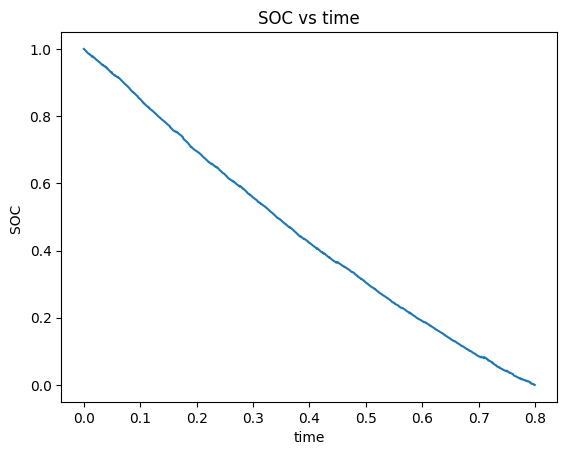

In [ ]:
y = soc_discharging[:]
x = df["time"].iloc[0:]
plt.plot(x,y)
plt.title("SOC vs time")
plt.xlabel("time")
plt.ylabel("SOC ")

**ML MODEL**

In [ ]:
no_error = False

while no_error is not True:
  soc_prev = soc_discharging[0:-1]
  vol = df["voltage"].iloc[0:-1].values
  cur = df["current"].iloc[0:-1].values
  # time = df["time"].iloc[0:-1].values
  soc_present = soc_discharging[1:]

  X = numpy.column_stack((vol,cur, soc_prev))
  y = soc_present

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  from sklearn.ensemble import RandomForestRegressor
  regressor = RandomForestRegressor(n_estimators = 5, random_state = 0, max_depth = 10)
  regressor.fit(X_train,y_train)

  predicted_soc = regressor.predict(X_test)
  actual_soc = numpy.array(y_test)

  error = (abs(predicted_soc-actual_soc))/actual_soc

  if max(error)>1:
    values = actual_soc[error>1]
    print(values)
    for j in range(0, len(values)):
      index = numpy.where(soc_discharging == values[j])
      df = df.drop(index[0])
      soc_discharging = numpy.delete(soc_discharging,index[0])
    continue

  else:
    no_error = True

print(max(error))


<ipython-input-20-cd2f3d4ac75a>:23: RuntimeWarning: divide by zero encountered in divide
  error = (abs(predicted_soc-actual_soc))/actual_soc


[0.]
[5.43226340e-05 3.53097566e-04]
0.5592423975818195


In [ ]:
mse = mean_squared_error(actual_soc, predicted_soc)
rmse = np.sqrt(mse)
r2 = r2_score(actual_soc, predicted_soc)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 5.773121714478626e-08
Root Mean Squared Error: 0.0002402732135398914
R-squared: 0.999999318697394


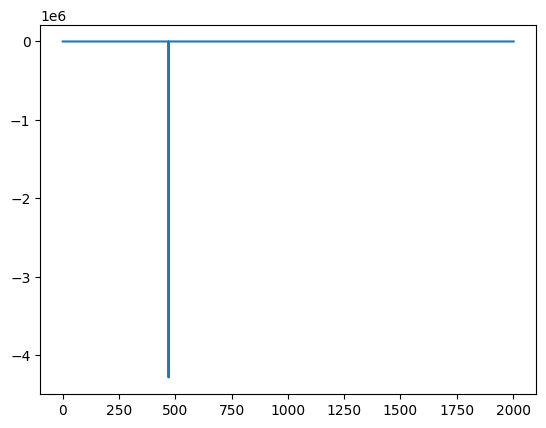

In [ ]:
m = error
n = range(0,len(actual_soc))
plt.plot(n,m)
plt.show()

In [ ]:
cap = port(regressor)
f = open("output.txt", "w")
print(cap, file=f)
f.close()

In [ ]:
with open('random_forest_regressor.h', 'w') as file:
    file.write(port(regressor))

In [ ]:
value = np.array([(11.3607-min_v)/range_v, (1.7606-min_i)/range_i, (78.5062-min_soc)/range_soc])
print(value)
result = regressor.predict([value])
print(result)
print((result*range_soc)+min_soc)


[9.03886570e-01 5.98236259e+03 1.06929522e+00]
[0.98925261]
[72.62973749]


In [ ]:
range_soc

73.41668469600857

In [ ]:
min_soc

0.0020903055314107633

In [ ]:
range_i

0.0016479480000004543

In [ ]:
min_i

-8.098022460000001

In [ ]:
range_v

3.2775878910000014

In [ ]:
min_v

8.398132322999999